In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
head1 = threeD_head.read_from_file(1,3)
head2 = threeD_head.read_from_file(1,4)

In [10]:
head1.full_filter()
head2.full_filter()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [ ]:
head1 = threeD_head.load_from_pickle(1,1)
head2 = threeD_head.load_from_pickle(1,2)

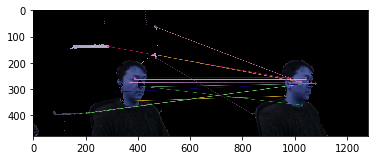

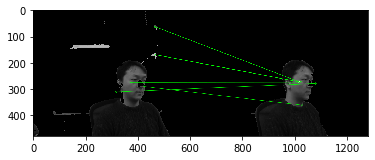

[[ 0.12713062 -0.11479237 -0.12503678]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54549662 -0.46890737  1.29896322]
 [ 0.54865062 -0.88095737  1.27996322]
 [ 0.54865062 -0.88095737  1.27996322]]
[[ 0.07557263  0.01404159  0.08881955]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]
 [ 0.04648463 -0.14458441 -0.00618045]]


In [68]:
mhead = MultiHead.joined_heads(head1,head2)

In [55]:
mhead.icp_transform(0,1)

0
found the best fit transform 0
found the best fit transform 1
hallo


In [16]:
for i in range(3,16):
    head1 = HEAD_RECON.threeD_head.read_from_file(1,i)
    head1.full_filter()
    head1.create_vpython_spheres()
    head1.save()

depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.
depth filter done.
dangling removal done
color filter done.


In [2]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [5]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
# head1.paint([0,1,0])
# head2.paint([0,0,1])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        heads.join_heads(i-1,i)
        heads.icp_transform(i-1,i)
    heads.save(sparcity=1) 

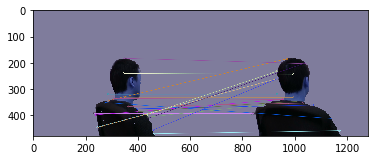

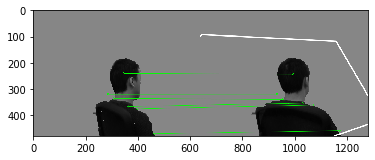

step:  0 before:  0.08018348011650005
found the best fit transform 0


In [11]:
make_mhead(all_heads,6,7)